## <font color="red"> ESERCIZIO 09

Per risolvere l'esercizio ho scritto un file `genetic.cpp` contenente tutte le funzioni necessarie al funzionamento di un algoritmo genetico. Oltre alle varie funzioni per stampare i risultati ho implementato:
- una funzione per generare città distribuite lungo una circonferenza;
- una funzione per calcolare le distanze (ho usato la $L^{(2)}$ indicata nel testo);
- quattro mutazioni: scambio di due città, shift di un certo numero di città a partire da una data posizione, scambio di un gruppo di città e inversione di ordine. Vengono chiamate tramite la funzione *Make_Mutation* che ne estrae una con un probabilità del 10%; i parametri necessari al funzionamento delle singole mutazioni vengono estratti casualmente e nessuna modifica mai l'hometown;
- una funzione di crossover come indicata nel testo (il crossover avviene con il 50% di probabilità);
- infine una funzione *Sons* che crea una nuova generazione nel seguente modo:
    1. valuta la lunghezza del percorso per ogni individuo e ordina dal migliore al peggiore; 
    2. estrae una posizione $i$ (nella prima metà $N$, cioè tra i migliori) usando il seguente operatore selection (riportato nel testo)
    $$ i=N\cdot r^2 $$
dove $r$ è un numero random estratto uniformemente in $[0,1)$ fino a creare un insieme di buoni genitori;
    3. estrae casualmente due genitori, fa il crossover e delle mutazioni fino a creare una nuova popolazione.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Circle(x, y, r):
    return x**2 + y**2 - r

def L2(xi, yi, xf, yf):
    return (xf - xi)**2 + (yf - yi)**2

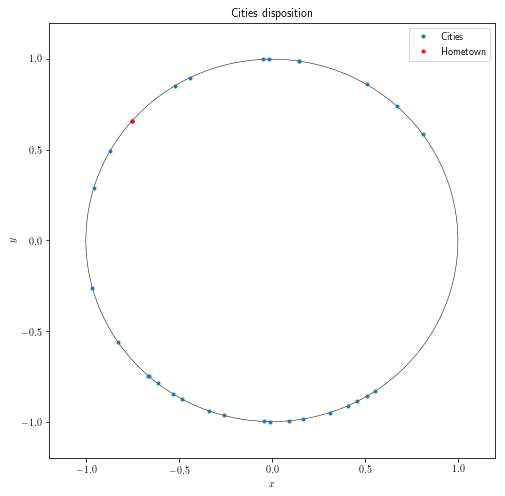

In [3]:
N = 100
r = 1.

# Construct the circle
xx = np.linspace(-r, r, N)
yy = np.linspace(-r, r, N)
X, Y = np.meshgrid(xx, yy)

plt.rc('text', usetex=True)
plt.figure(figsize=(8, 8))

plt.title('Cities disposition')
x, y = np.loadtxt("Risultati/circ.0", usecols=(0,1), unpack='true')
plt.plot(x, y, linestyle=' ', marker='.', label='Cities')
plt.plot(x[0], y[0], linestyle=' ', marker='.', color='red', label='Hometown')
plt.contour(X, Y, Circle(X, Y, r), [0], linewidths=0.5, colors='black')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

Quella in figura è la disposizione di 30 città utilizzata. A partire dalla hometown il percorso più breve si costruisce andando di volta in volta nella città più vicina: in questo caso mi aspetto un percorso di spezzate in senso antiorario.

Per la simulazione ho scelto i seguenti parametri:
- numero di mutazioni: 14,
- numero di generazioni: 2000,
- popolazione: 1000.

Ho scelto questi parametri dopo qualche prova, in modo da avere una popolazione abbastanza variegata. Osservo in particolare che dopo 2000 generazioni il risultato rimane stabile.

La simulazione quindi procede così:
1. vengono estratte le città controllando che non ci siano ripetizioni;
2. viene generata la popolazione facendo mutare (1000 mutazioni) la popolazione originale;
3. vengono create le nuove generazioni, stampando in `L2.shortest` la lunghezza del percorso migliore e in `length.ave` la lunghezza media del percorso per la miglior metà della popolazione;
4. viene stampato il percorso migliore in `config.fin`.

Si ottengono i seguenti risultati (per chiarezza non ho riportato le deviazioni standard nel primo grafico):

In [4]:
# Compute the optimized path length
xc, yc = np.loadtxt("Risultati/circ.fin", usecols=(0,1), unpack='true')
dim = np.size(xc)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xc[i], yc[i], xc[i+1], yc[i+1])

print('Optimized configuration path length = ', sum)

Optimized configuration path length =  3.3267205764689596


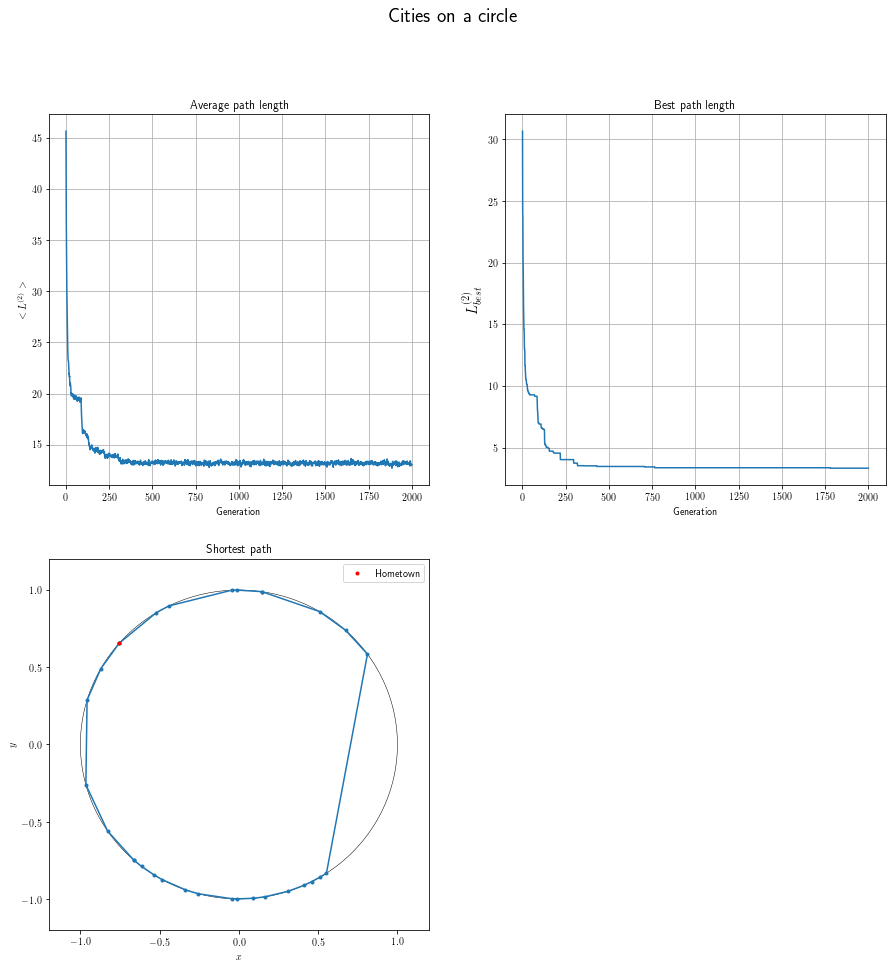

In [5]:
plt.figure(figsize=(15,15))
plt.suptitle('Cities on a circle',fontsize=20)

plt.subplot(221)
plt.title('Average path length')
x, y= np.loadtxt("Risultati/circ.ave", usecols=(0,1), unpack='true')
plt.plot(x, y)

plt.xlabel('Generation')
plt.ylabel('$<L^{(2)}>$')
plt.grid(True)

plt.subplot(222)
plt.title('Best path length')
x, y= np.loadtxt("Risultati/circ.shortest", usecols=(0,1), unpack='true')
plt.plot(x, y)

plt.xlabel('Generation')
plt.ylabel('$L^{(2)}_{best}$', fontsize=15)
plt.grid(True)

plt.subplot(223)
plt.title('Shortest path')
plt.plot(xc, yc, marker='.')
plt.plot(xc[0], yc[0], linestyle=' ', marker='.', color='red', label='Hometown')
plt.contour(X, Y, Circle(X, Y, r), [0], linewidths=0.5, colors='black')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

Osservando il percorso ottenuto il risultato pare plausibile.

Ripeto infine la simulazione con le città in un quadrato:

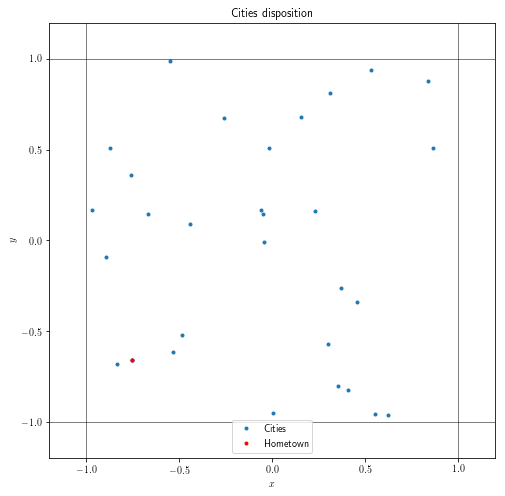

In [6]:
l = 1.

plt.rc('text', usetex=True)
plt.figure(figsize=(8, 8))

plt.title('Cities disposition')
x, y = np.loadtxt("Risultati/sq.0", usecols=(0,1), unpack='true')
plt.plot(x, y, linestyle=' ', marker='.', label='Cities')
plt.plot(x[0], y[0], linestyle=' ', marker='.', color='red', label='Hometown')

plt.axhline(y=-l, xmin=-l, xmax=l, color='black', linewidth=0.5)
plt.axhline(y=l, xmin=-l, xmax=l, color='black', linewidth=0.5)
plt.axvline(x=-l, ymin=-l, ymax=l, color='black', linewidth=0.5)
plt.axvline(x=l, ymin=-l, ymax=l, color='black', linewidth=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

In [7]:
# Compute the optimized path length
xb, yb = np.loadtxt("Risultati/sq.fin", usecols=(0,1), unpack='true')
dim = np.size(xb)
sum = 0.

for i in range(dim - 1):   # the last city is the first
    sum += L2(xb[i], yb[i], xb[i+1], yb[i+1])

print('Optimized configuration path length = ', sum)

Optimized configuration path length =  3.8624747412787896


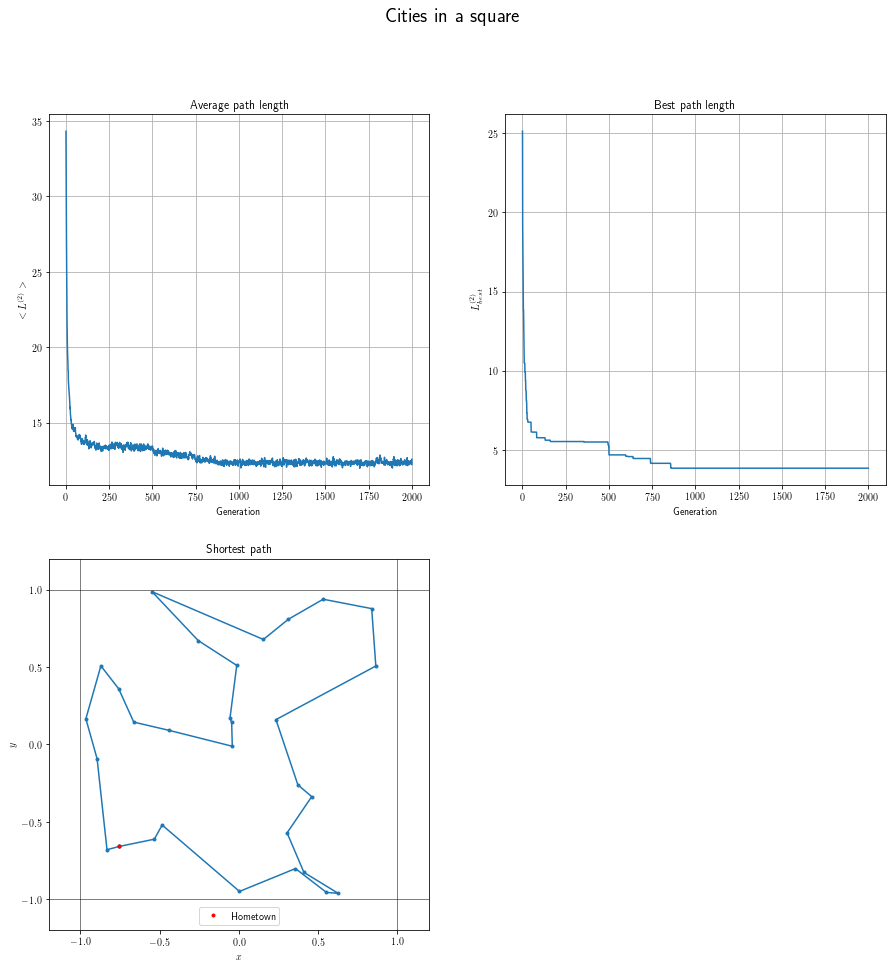

In [8]:
plt.figure(figsize=(15,15))
plt.suptitle('Cities in a square',fontsize=20)

plt.subplot(221)
plt.title('Average path length')
x, y= np.loadtxt("Risultati/sq.ave", usecols=(0,1), unpack='true')
plt.plot(x, y)

plt.xlabel('Generation')
plt.ylabel('$<L^{(2)}>$')
plt.grid(True)

plt.subplot(222)
plt.title('Best path length')
x, y= np.loadtxt("Risultati/sq.shortest", usecols=(0,1), unpack='true')
plt.plot(x, y)

plt.xlabel('Generation')
plt.ylabel('$L^{(2)}_{best}$')
plt.grid(True)

plt.subplot(223)
plt.title('Shortest path')
plt.plot(xb, yb, marker='.')
plt.plot(xb[0], yb[0], linestyle=' ', marker='.', color='red', label='Hometown')
plt.axhline(y=-l, xmin=-l, xmax=l, color='black', linewidth=0.5)
plt.axhline(y=l, xmin=-l, xmax=l, color='black', linewidth=0.5)
plt.axvline(x=-l, ymin=-l, ymax=l, color='black', linewidth=0.5)
plt.axvline(x=l, ymin=-l, ymax=l, color='black', linewidth=0.5)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()

In questo caso non so dire se il risultato è il percorso più breve, ma noto che l'algoritmo converge verso valori sempre più piccoli e quindi l'ottimizzazione funziona.